# Retrieve Dataset

This notebook is used to capture a dataset.
The dataset contains RGB and depth images of both cameras, zivid and realsense.
Besides the images, the dataset stores the intrisic camera matrizes and distortion coefficients of both RGB lenses.

In [1]:
# import dependencies
import time
import numpy as np
from pathlib import Path
# import required modules
from models.camera_interfaces.real_sense import RealSense
from models.camera_interfaces.zivid import Zivid
from models.dataset.dataset_container import DatasetContainer

In [2]:
resource_path = Path("../../resources")

class Args:
    picture_amount = 3                  # how many frames to collect
    delay = 500                         # delay between exposures in ms
    zivid_configuration_path: resource_path / Path("calibrations/zivid.yml") # zivid settings
    dataset_path = resource_path / Path("images/uncalibrated/dataset_3_4.npz") # where the captures dataset should be saved
args = Args()

# Connect to cameras

In [3]:
# make sure both instances are destroyed. Otherwise they are still connected to the cameras
%reset_selective -f real_sense
%reset_selective -f zivid
# instantiate and connect to cameras
real_sense = RealSense()
real_sense.connect()
print("Connected to realsense camera")

zivid = Zivid()
zivid.connect()
print("Connected to zivid camera")
# zivid.configure_manual(args.zivid_configuration_path)
zivid.configure_automatically()

print("Connected to both cameras")

rs_intrinsics = real_sense.get_camera_matrix_and_distortion()
zv_intrinsics = zivid.get_camera_matrix_and_distortion()

dataset_container = DatasetContainer()
dataset_container.load_from_intrinsics(*rs_intrinsics, *zv_intrinsics)

RealSense Configuration
camera product line: D400
camera product id:   0B07
Depth Camera Intrinsics
Principal Point (ppx ppy):    635.5166625976562 359.2284851074219
Focal Length (fx fy):         639.042724609375 639.042724609375
Distortion Coeffs:            [0.0, 0.0, 0.0, 0.0, 0.0]
Distortion Model:             distortion.brown_conrady
HeightxWidth:                 720x1280
Color Camera Intrinsics
Principal Point (ppx ppy):    936.4846801757812 537.48779296875
Focal Length (fx fy):         1377.6448974609375 1375.7239990234375
Distortion Coeffs:            [0.0, 0.0, 0.0, 0.0, 0.0]
Distortion Model:             distortion.inverse_brown_conrady
HeightxWidth:                 1080x1920
Connected to realsense camera
Zivid Configuration
Color Camera Intrinsics
Principal Point (ppx ppy):    951.68 594.779
Focal Length (fx fy):         2760.12 2759.78
Distortion Coeffs:            [-2.73150e-01  3.54379e-01 -3.44441e-04  1.98413e-04 -3.22515e-01]
Connected to zivid camera
automatically con

## Collect Pictures

In [72]:
dataset_container = DatasetContainer()
dataset_container.load_from_intrinsics(*rs_intrinsics, *zv_intrinsics)

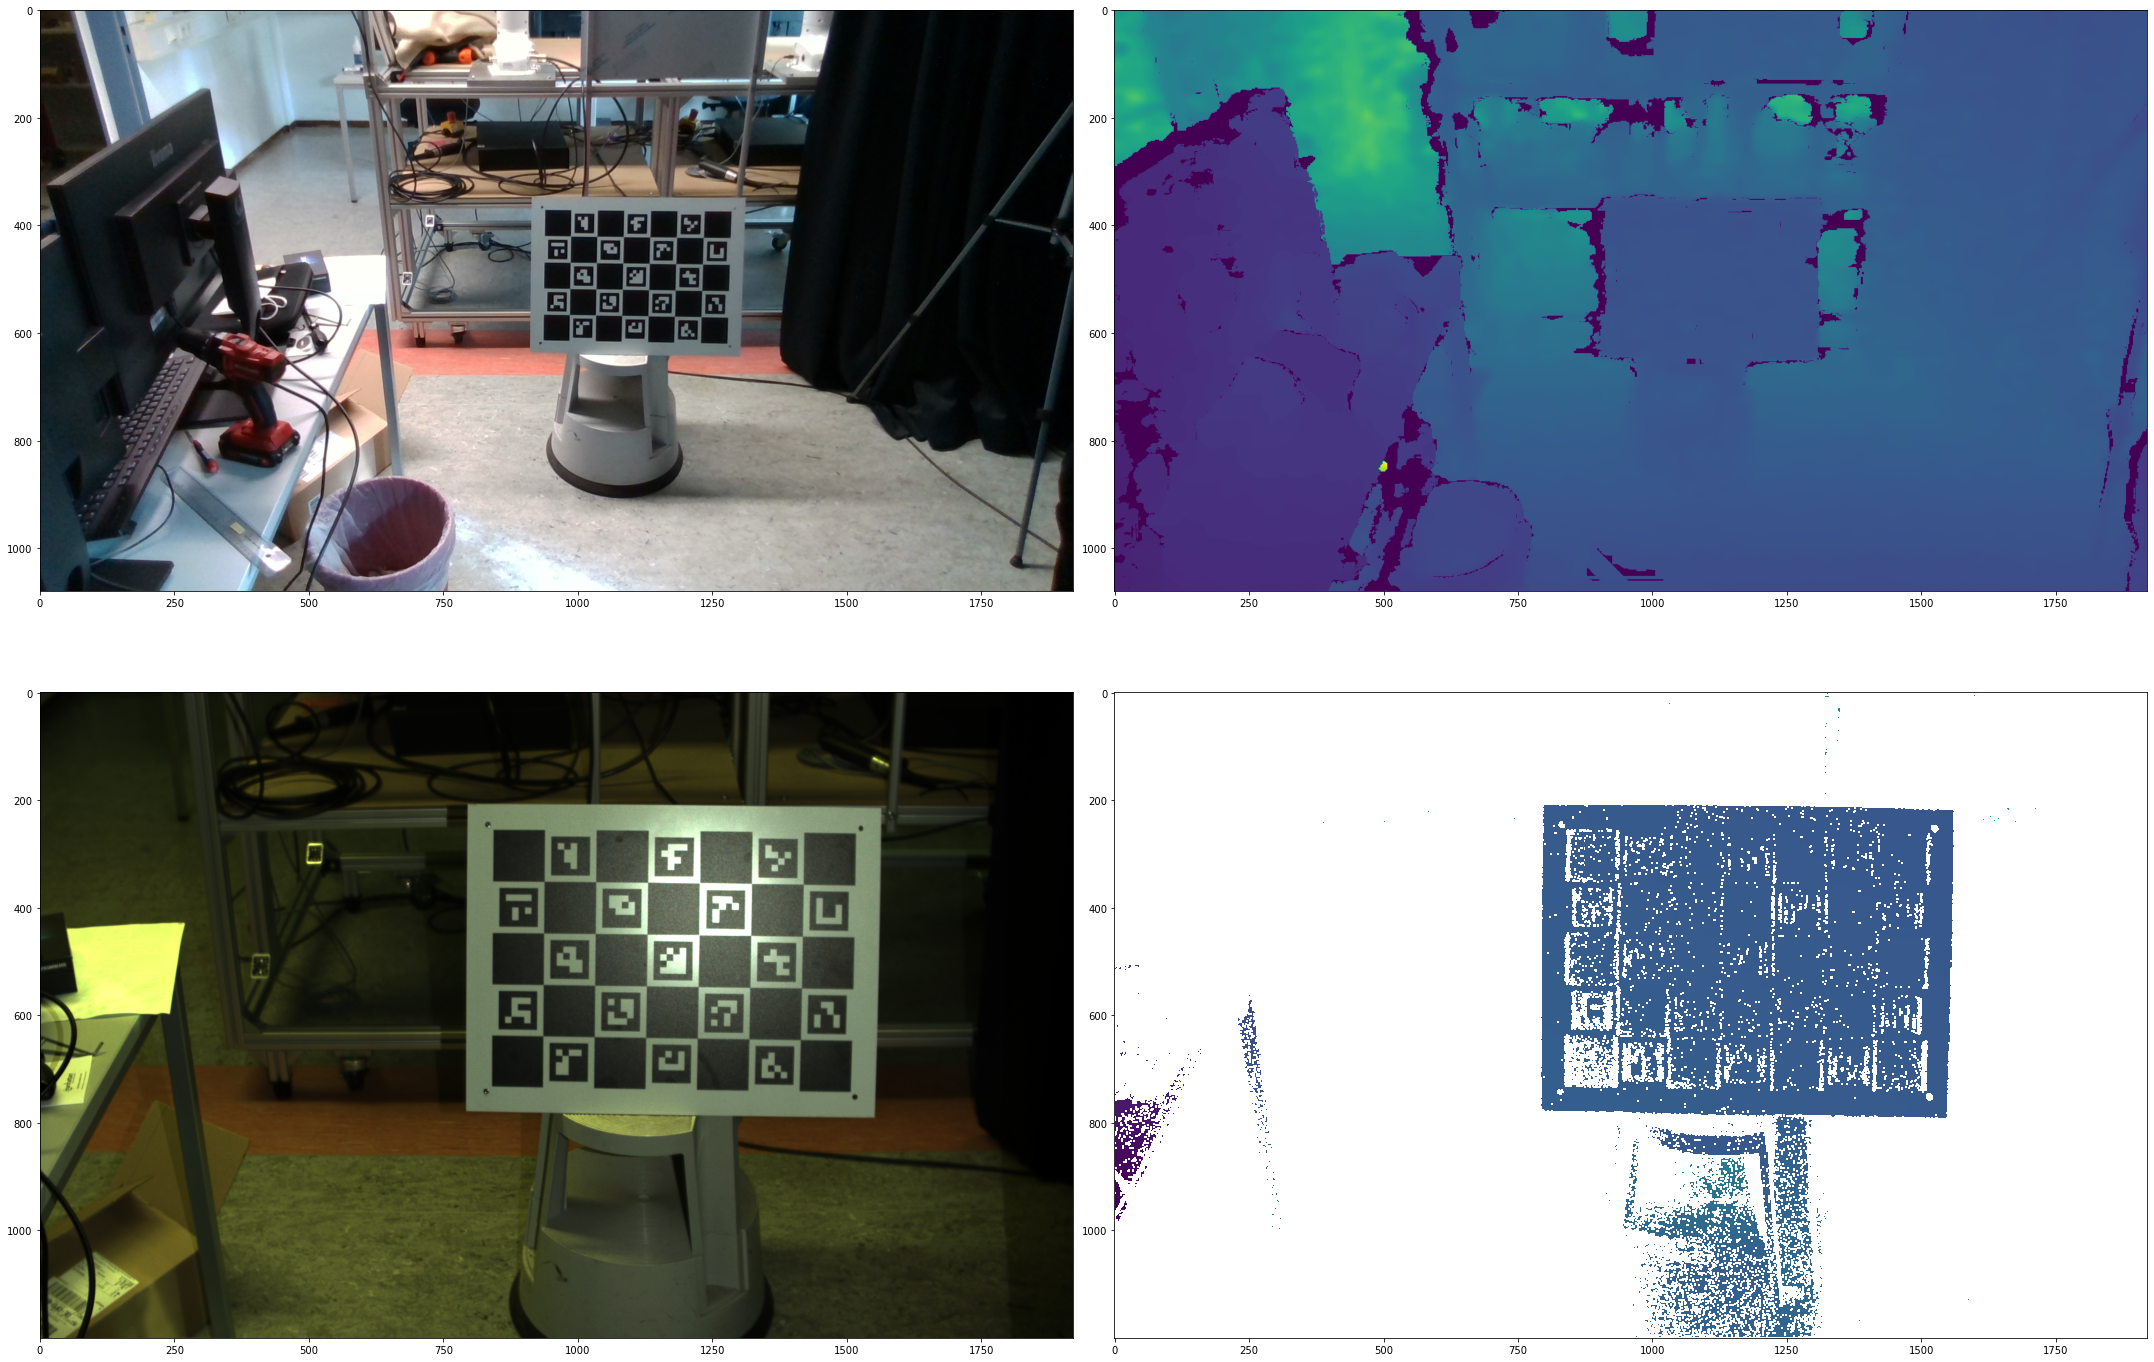

In [87]:
# execute this cell to generate and append pairs of images. The images won't be saved.
# for i in range(args.picture_amount):
rs_frames = real_sense.collect_frame()
zv_frames = zivid.collect_frame()
dataset_container.append(*rs_frames, *zv_frames)

import cv2
# calibration = np.loadtxt(resource_path / Path("calibrations/regression/calibration_from_1_2_3.np"))
# rs_rgb = cv2.warpPerspective(rs_frames[0], calibration, (zv_frames[0].shape[1], zv_frames[0].shape[0]))
# rs_depth = cv2.warpPerspective(rs_frames[1], calibration, (zv_frames[0].shape[1], zv_frames[0].shape[0]))
rs_rgb = rs_frames[0]
rs_depth = rs_frames[1]

# time.sleep(args.delay / 1000.0)
from matplotlib import pyplot as plt
f, axarr = plt.subplots(2, 2, figsize=(30, 20))
f.tight_layout()
axarr[0][0].imshow(cv2.cvtColor(rs_rgb, cv2.COLOR_BGR2RGB))
axarr[0][1].imshow(rs_depth)
axarr[1][0].imshow(cv2.cvtColor(zv_frames[0], cv2.COLOR_BGR2RGB))
axarr[1][1].imshow(zv_frames[1])


## Save Picture-Pairs

In [88]:
dataset_path = resource_path / Path("images/uncalibrated/c_dataset_h_2.npz") # where the captures dataset should be saved
dataset_container.save(dataset_path)
print(f"Dataset saved to {dataset_path}")

Dataset saved to ../../resources/images/uncalibrated/c_dataset_h_2.npz
